# Unmasking Crime Patterns
- A Data-Driven Exploration of Crime and Society in India

## Presented By :
  - Sambodhi Bhowal BT24CSD065
  - Rakshit Ladda BT24CSD066
  
## Guided By:
  - Santosh Sahu Sir

## Objective

This notebook performs a multi-dimensional crime analysis across India using:
- District-level Crime Data (2001–2012)
- Crimes Against Women, SC, ST, Children
- State-level Police Strength
- Census Indicators (Population, Literacy, Urbanization, Education)
- Prisoner Education, Rehabilitation & Vocational Training
- Recidivism Trends

The goal is to understand trends, correlations, geographic hotspots, and socio-economic drivers of crime.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plt.style.use("ggplot")
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

In [ ]:
crime =   pd.read_excel("cleanedupDataset//Master_Crime.xlsx")
statedata = pd.read_excel("cleanedupDataset//State_master.xlsx")


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [ ]:
crime.shape

(8597, 42)

In [ ]:
statedata.shape

(445, 15)

In [ ]:
crime.columns

Index(['  STATE', 'DISTRICT', 'YEAR', 'KEY', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'total_crime_against_sc_raw', 'total_crime_against_sc',
       'total_crimes_st_raw', 'total_crime_against_st',
       'total_crimes_against_women_raw', 'total_crime_against_wo

In [ ]:
statedata.columns

Index(['STATE', 'YEAR', 'Key', 'elementary_education', 'adult_education',
       'higher_education', 'computer_course', 'total_ps',
       'total_police_strength', 'convicts_admitted_raw', 'total_convicted',
       'habitual_offenders', 'total_habitual_offenders', 'vocational_count',
       'total_vocational_relief'],
      dtype='object')

In [ ]:
# Standardize Column Names
crime = clean_columns(crime)

statedata = clean_columns(statedata)


In [ ]:
crime.head()

,state,district,year,key,murder,attempt_to_murder,culpable_homicide_not_amounting_to_murder,rape,custodial_rape,other_rape,...,other_ipc_crimes,total_ipc_crimes,total_crime_against_sc_raw,total_crime_against_sc,total_crimes_st_raw,total_crime_against_st,total_crimes_against_women_raw,total_crime_against_women,total_crime_on_children_raw,total_crime_against_children
0,ANDHRA PRADESH,ADILABAD,2001.0,ANDHRA PRADESH-ADILABAD#2001,101.0,60.0,17.0,50.0,0.0,50.0,...,1518.0,4154.0,55.0,55.0,18.0,18.0,454.0,454.0,0.0,0.0
1,ANDHRA PRADESH,ANANTAPUR,2001.0,ANDHRA PRADESH-ANANTAPUR#2001,151.0,125.0,1.0,23.0,0.0,23.0,...,754.0,4125.0,127.0,127.0,14.0,14.0,356.0,356.0,66.0,66.0
2,ANDHRA PRADESH,CHITTOOR,2001.0,ANDHRA PRADESH-CHITTOOR#2001,101.0,57.0,2.0,27.0,0.0,27.0,...,1262.0,5818.0,114.0,114.0,2.0,2.0,456.0,456.0,0.0,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001.0,ANDHRA PRADESH-CUDDAPAH#2001,80.0,53.0,1.0,20.0,0.0,20.0,...,1181.0,3140.0,100.0,100.0,4.0,4.0,278.0,278.0,0.0,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,ANDHRA PRADESH-EAST GODAVARI#2001,82.0,67.0,1.0,23.0,0.0,23.0,...,2313.0,6507.0,89.0,89.0,14.0,14.0,475.0,475.0,0.0,0.0


In [ ]:
statedata.head()

,state,year,key,elementary_education,adult_education,higher_education,computer_course,total_ps,total_police_strength,convicts_admitted_raw,total_convicted,habitual_offenders,total_habitual_offenders,vocational_count,total_vocational_relief
0,Andhra Pradesh,2001,Andhra Pradesh-2001,2699,2161,301,52,25020.0,25020.0,17345.0,17345.0,1063.0,1063.0,270.0,270.0
1,Andhra Pradesh,2002,Andhra Pradesh-2002,2420,4745,396,34,57650.0,57650.0,13322.0,13322.0,318.0,318.0,530.0,530.0
2,Andhra Pradesh,2003,Andhra Pradesh-2003,1606,7594,369,39,25272.0,25272.0,15682.0,15682.0,536.0,536.0,56.0,56.0
3,Andhra Pradesh,2004,Andhra Pradesh-2004,5950,8213,305,30,24886.0,24886.0,14397.0,14397.0,399.0,399.0,405.0,405.0
4,Andhra Pradesh,2005,Andhra Pradesh-2005,3720,10962,389,1,25748.0,25748.0,12389.0,12389.0,977.0,977.0,808.0,808.0


In [ ]:
crime['women_crime_percent'] = (crime['total_crime_against_women'] / crime['total_ipc_crimes']) * 100
crime['sc_crime_percent'] = (crime['total_crime_against_sc'] / crime['total_ipc_crimes']) * 100
crime['st_crime_percent'] = (crime['total_crime_against_st'] / crime['total_ipc_crimes']) * 100
crime['child_crime_percent'] = (crime['total_crime_against_children'] / crime['total_ipc_crimes']) * 100

In [ ]:
crime

,state,district,year,key,murder,attempt_to_murder,culpable_homicide_not_amounting_to_murder,rape,custodial_rape,other_rape,...,total_crimes_st_raw,total_crime_against_st,total_crimes_against_women_raw,total_crime_against_women,total_crime_on_children_raw,total_crime_against_children,women_crime_percent,sc_crime_percent,st_crime_percent,child_crime_percent
0,ANDHRA PRADESH,ADILABAD,2001.0,ANDHRA PRADESH-ADILABAD#2001,101.0,60.0,17.0,50.0,0.0,50.0,...,18.0,18.000000,454.0,454.000000,0.0,0.000000,10.929225,1.324025,0.433317,0.000000
1,ANDHRA PRADESH,ANANTAPUR,2001.0,ANDHRA PRADESH-ANANTAPUR#2001,151.0,125.0,1.0,23.0,0.0,23.0,...,14.0,14.000000,356.0,356.000000,66.0,66.000000,8.630303,3.078788,0.339394,1.600000
2,ANDHRA PRADESH,CHITTOOR,2001.0,ANDHRA PRADESH-CHITTOOR#2001,101.0,57.0,2.0,27.0,0.0,27.0,...,2.0,2.000000,456.0,456.000000,0.0,0.000000,7.837745,1.959436,0.034376,0.000000
3,ANDHRA PRADESH,CUDDAPAH,2001.0,ANDHRA PRADESH-CUDDAPAH#2001,80.0,53.0,1.0,20.0,0.0,20.0,...,4.0,4.000000,278.0,278.000000,0.0,0.000000,8.853503,3.184713,0.127389,0.000000
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,ANDHRA PRADESH-EAST GODAVARI#2001,82.0,67.0,1.0,23.0,0.0,23.0,...,14.0,14.000000,475.0,475.000000,0.0,0.000000,7.299831,1.367758,0.215153,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI UT,WEST,2012.0,DELHI UT-WEST#2012,52.0,37.0,10.0,79.0,0.0,79.0,...,NaN,8.260368,NaN,237.314896,NaN,26.252469,4.269789,0.790927,0.148621,0.472337
8593,LAKSHADWEEP,LAKSHADWEEP,2012.0,LAKSHADWEEP-LAKSHADWEEP#2012,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,2.0,2.000000,0.0,0.000000,3.333333,0.000000,0.000000,0.000000
8594,PUDUCHERRY,KARAIKAL,2012.0,PUDUCHERRY-KARAIKAL#2012,5.0,6.0,2.0,6.0,0.0,6.0,...,0.0,0.000000,11.0,11.000000,7.0,7.000000,1.397713,0.127065,0.000000,0.889454
8595,PUDUCHERRY,PUDUCHERRY,2012.0,PUDUCHERRY-PUDUCHERRY#2012,24.0,21.0,10.0,7.0,0.0,7.0,...,0.0,0.000000,35.0,35.000000,25.0,25.000000,1.001717,0.658271,0.000000,0.715512


How has crime changed with time in india from 2001-2012?

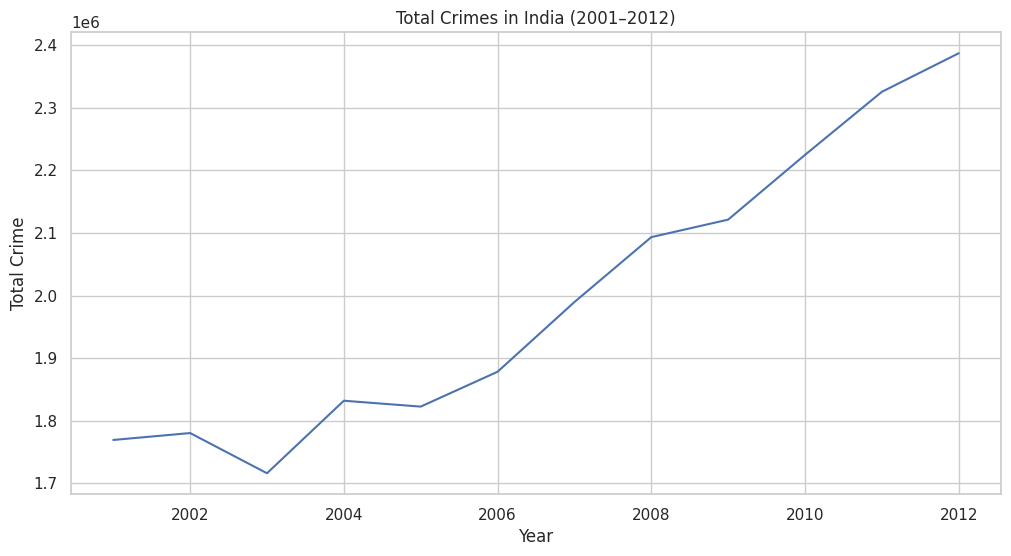

In [ ]:
yearly = crime.groupby('year')['total_ipc_crimes'].sum()

plt.plot(yearly.index, yearly.values)
plt.title("Total Crimes in India (2001–2012)")
plt.xlabel("Year")
plt.ylabel("Total Crime")
plt.show()

As we can see here the no of crimes in india has grown tremendously since 2007-08 this coincides with the economic crashes of this era.

## Which states show the highest overall crime levels?
This question identifies the states contributing most to total crime across India from 2001–2012.
By aggregating crime counts over multiple years, we get a stable picture of chronic high-crime states rather than year-specific fluctuations.
This helps policymakers prioritize regions for resource allocation, policing improvement, and targeted crime-prevention initiatives.

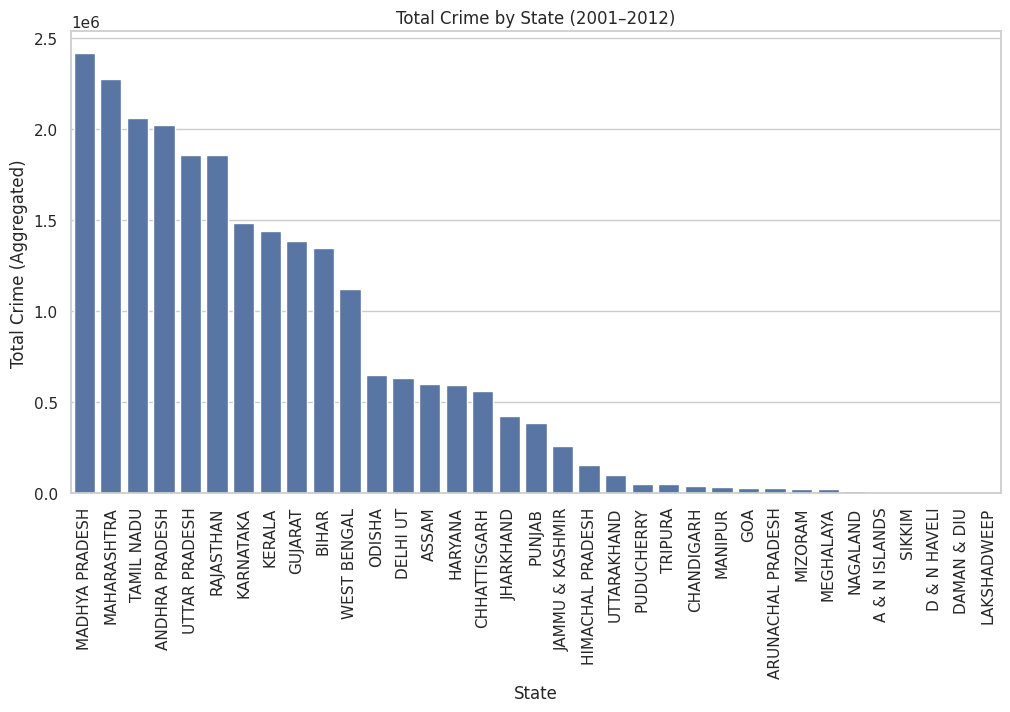

In [ ]:
state_total = crime.groupby('state')['total_ipc_crimes'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=state_total.index, y=state_total.values)
plt.xticks(rotation=90)
plt.title("Total Crime by State (2001–2012)")
plt.ylabel("Total Crime (Aggregated)")
plt.xlabel("State")
plt.show()

- States such as Madhya Pradesh, Maharashtra, and Tamil Nadu show the highest total crime counts over the 12-year period.
These states represent major population centers and/or regions with intensive reporting, policing challenges, and socio-economic stress.
- This highlights where long-term investments in policing and justice delivery may be most needed.

- Also in states like Jammu and Kashmir and Manipur there may have been a under reporting of crime, so we must also consider those states

## Are crimes against women rising faster than overall crime?

Crimes against women are a crucial indicator of social safety.
By comparing their growth trend with overall crime, we can understand whether women are becoming more vulnerable or whether reporting and awareness have improved.
This is one of the most relevant and socially meaningful analyses.

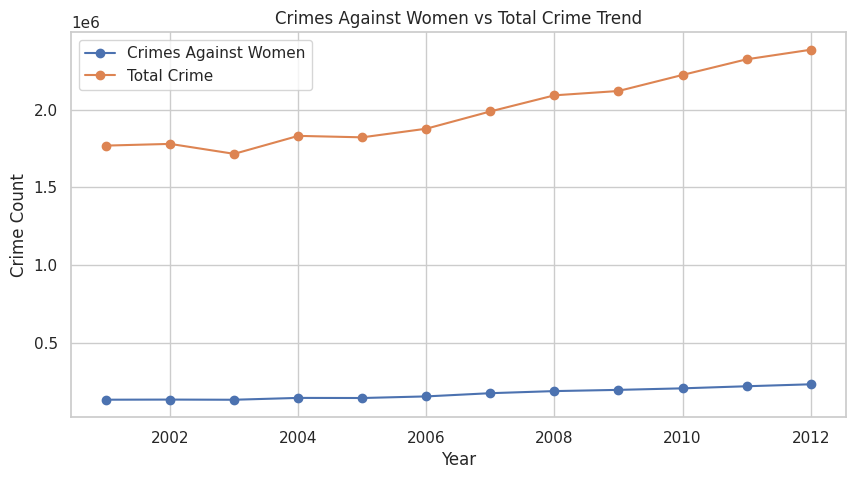

In [ ]:
women_trend = crime.groupby('year')['total_crime_against_women'].sum()
overall_trend = crime.groupby('year')['total_ipc_crimes'].sum()

plt.figure(figsize=(10,5))
plt.plot(women_trend.index, women_trend.values, marker='o', label='Crimes Against Women')
plt.plot(overall_trend.index, overall_trend.values, marker='o', label='Total Crime')
plt.title("Crimes Against Women vs Total Crime Trend")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid(True)
plt.show()

- As we can see that the rate of crime against women have been steady while the rate of growth of total crimes has been on an increase this may suggest stabalization of women rights and safety
- However we must also consider the fact that crimes against women are the most underreported crimes and no significant increase in the no of cases reported may indicate the persistent under reoporting of crimes against woment and the societal stigma on the victims

# Does a larger police force reduce the number of convictions?
This analysis checks whether states with higher police strength actually experience lower crime.
If police strength and crime have negative correlation, policing is effective.

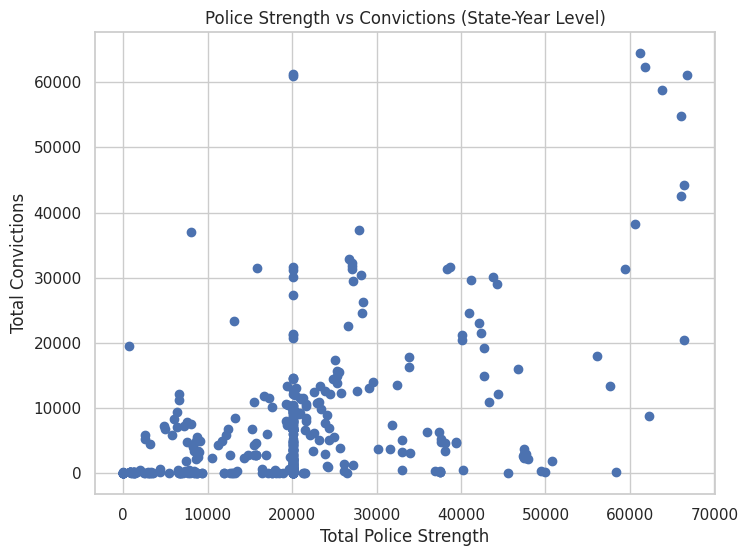

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(statedata['total_police_strength'], statedata['total_convicted'])
plt.xlabel("Total Police Strength")
plt.ylabel("Total Convictions")
plt.title("Police Strength vs Convictions (State-Year Level)")
plt.grid(True)
plt.show()

So we can see that although there is a correlation between police strength and convictions its not as strong as we might expect it to be most of the convitions lie in the range of 10000-30000 police men

# How do crimes against SC/ST  distribute  across states?


In [ ]:
df = crime.copy()


df = df[df['total_ipc_crimes'] > 0]


state_ratio = df.groupby('state')[['sc_crime_percent','st_crime_percent']].mean().reset_index()
state_ratio = state_ratio.sort_values('sc_crime_percent', ascending=False)

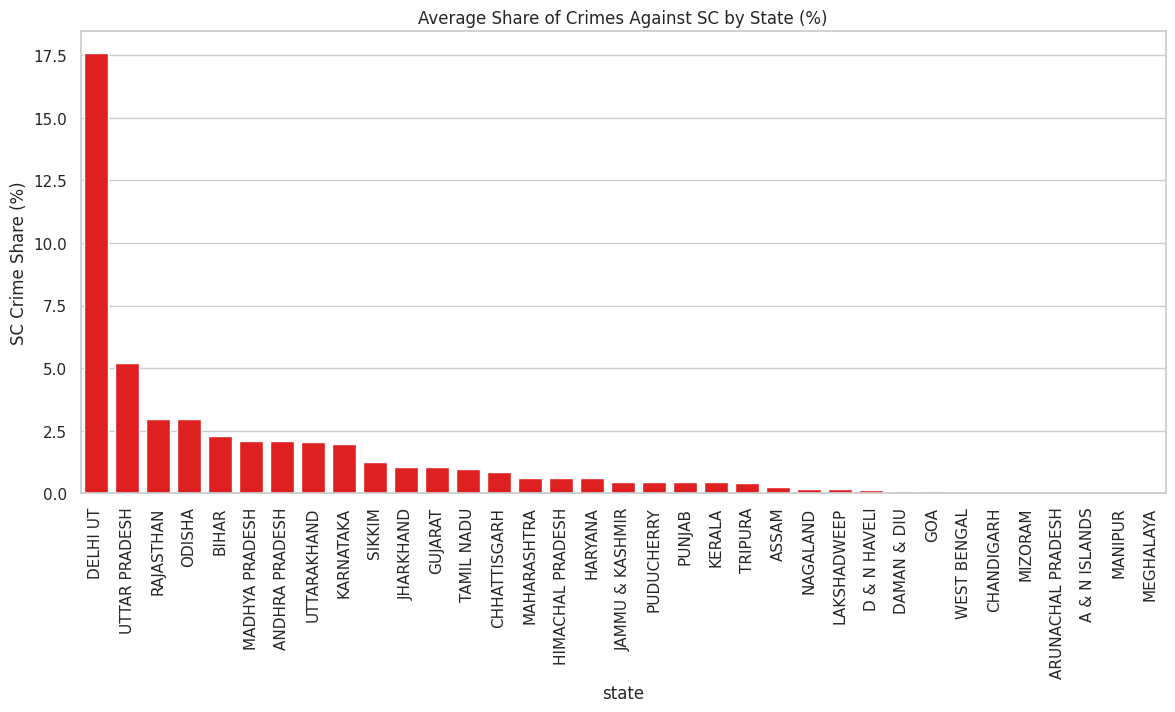

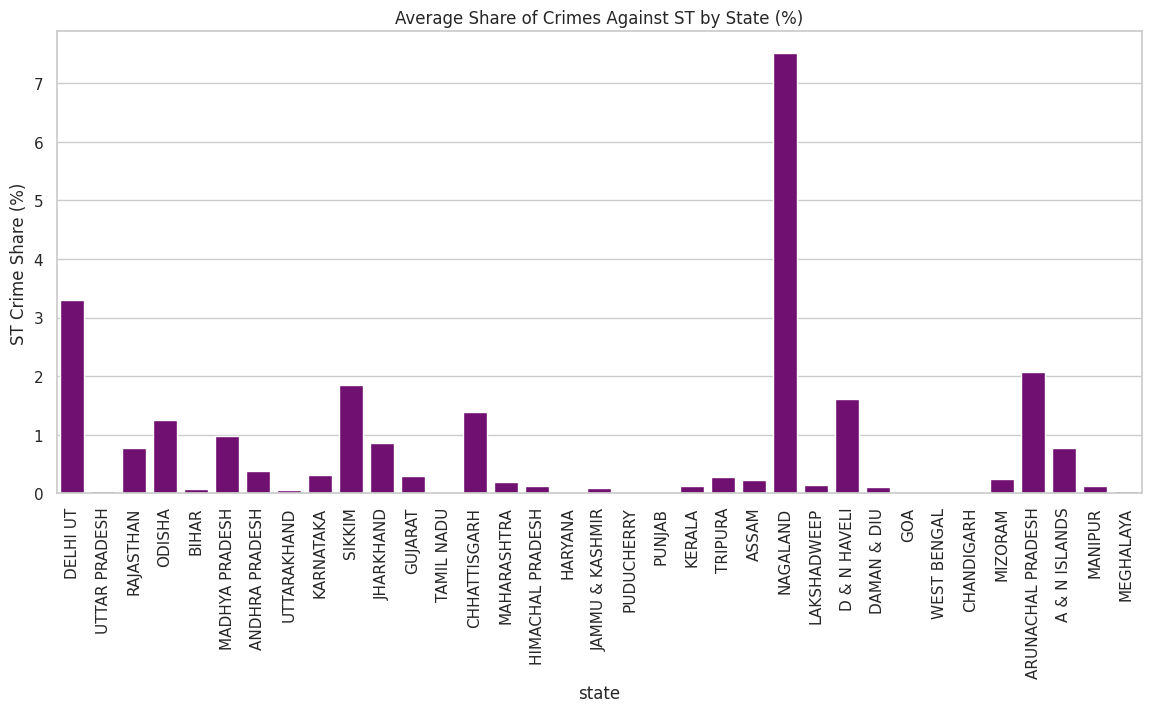

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=state_ratio, x='state', y='sc_crime_percent', color='red')
plt.title("Average Share of Crimes Against SC by State (%)")
plt.xticks(rotation=90)
plt.ylabel("SC Crime Share (%)")
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(data=state_ratio, x='state', y='st_crime_percent', color='purple')
plt.title("Average Share of Crimes Against ST by State (%)")
plt.xticks(rotation=90)
plt.ylabel("ST Crime Share (%)")
plt.show()

## Comparing habitual offender rates of different states and the correlationt to no of convictions

if there are more convictions is it also necessairly true that the number of repeat offenders will be more too?


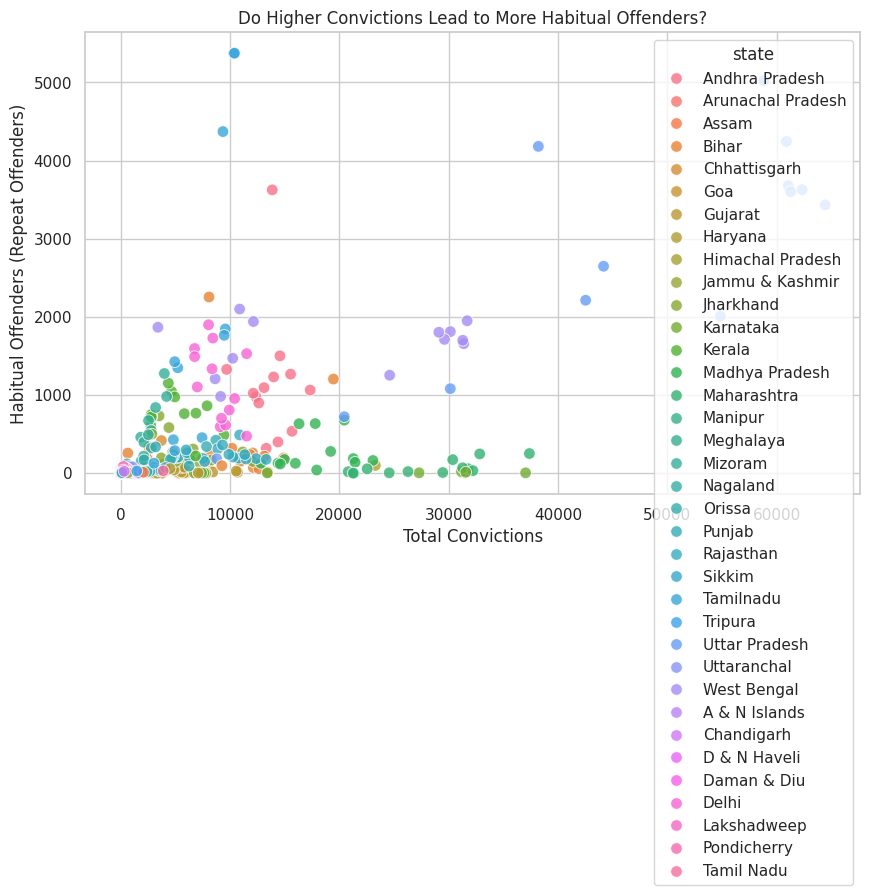

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='total_convicted',
    y='total_habitual_offenders',
    hue='state',
    s=70,
    alpha=0.8
)

plt.title("Do Higher Convictions Lead to More Habitual Offenders?")
plt.xlabel("Total Convictions")
plt.ylabel("Habitual Offenders (Repeat Offenders)")
plt.grid(True)
plt.show()

We can see that upto a certain point the number of repeat offences is steady no matter the number of incarcinations this may indicate that most ex criminals dont return to a life of crime

---



# What are the top 10 States with Highest Habitual Offenders

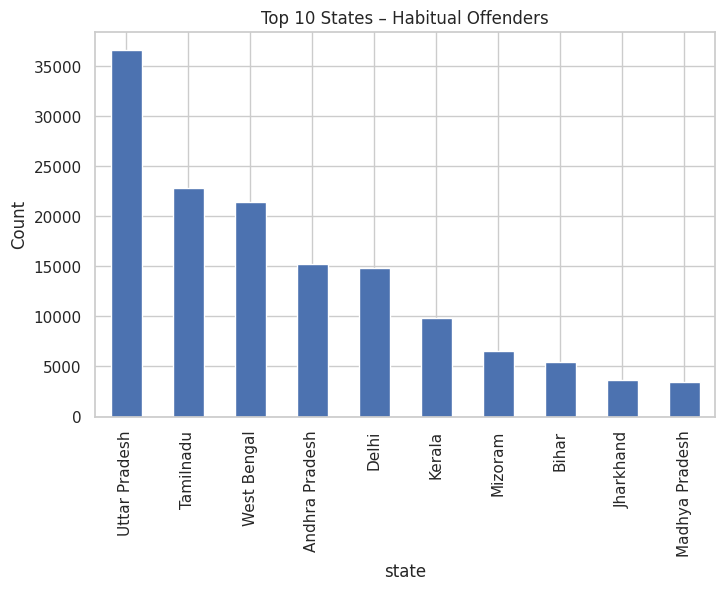

In [ ]:
df = statedata.groupby('state')['total_habitual_offenders'].sum().sort_values(ascending=False).head(10)

df.plot(kind='bar', figsize=(8,5), title='Top 10 States – Habitual Offenders')
plt.ylabel('Count')
plt.show()

# What are the  Top States in Prison Education ?

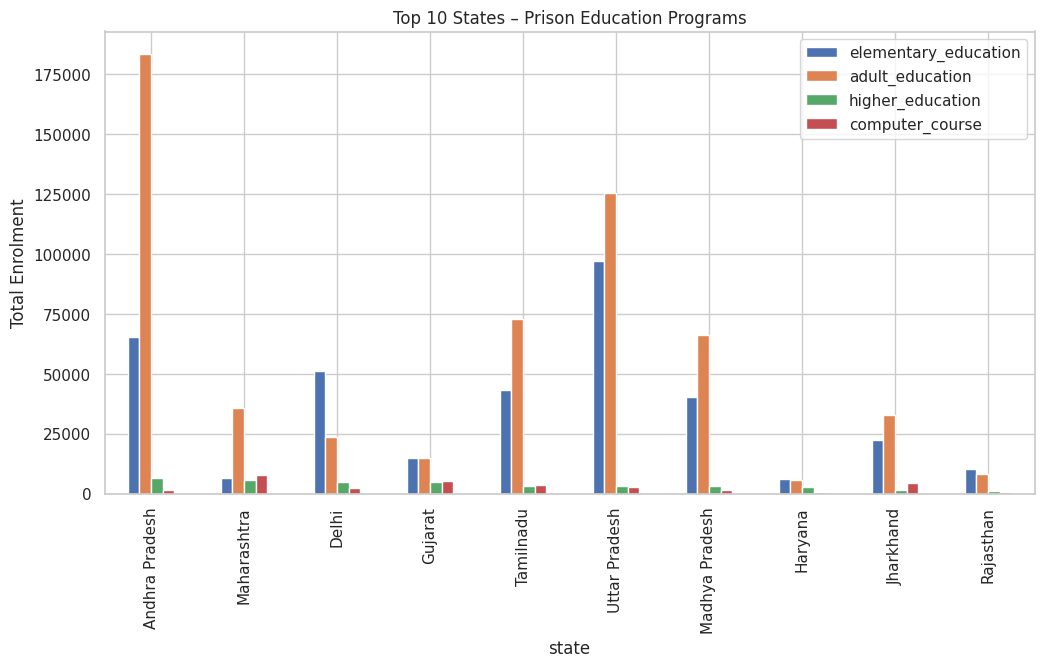

In [ ]:
edu_cols = ['elementary_education','adult_education','higher_education','computer_course']

df_edu = statedata.groupby('state')[edu_cols].sum().sort_values('higher_education', ascending=False)

df_edu.head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 States – Prison Education Programs")
plt.ylabel("Total Enrolment")
plt.show()

This shows that states like andhra Pradesh and Mahrashtra are actively putting effor into educating the prison population in hopes that they can get decent job after they get out of prison

# What states are investion in vocational training of their prison population? and what might it indicate

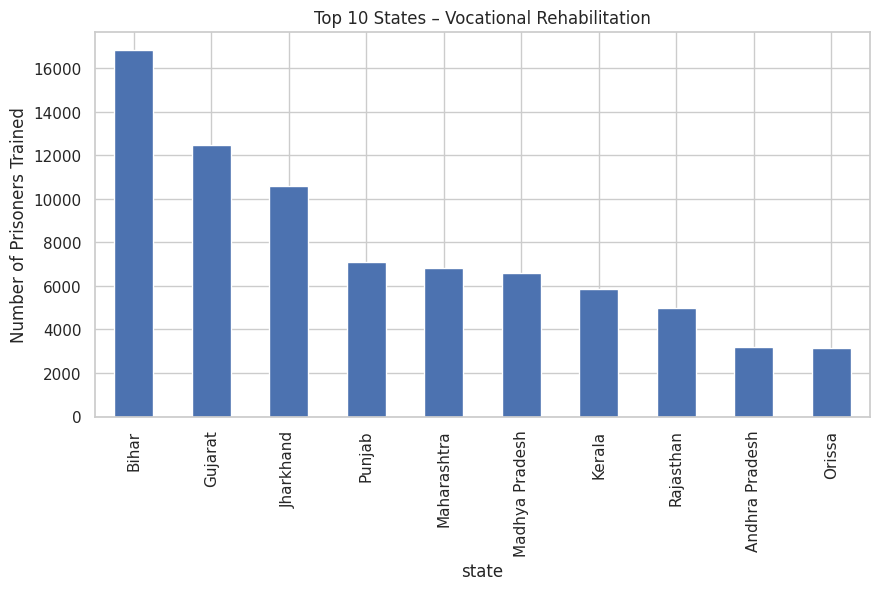

In [ ]:
df_voc = statedata.groupby('state')['total_vocational_relief'].sum().sort_values(ascending=False).head(10)

df_voc.plot(kind='bar', figsize=(10,5), title="Top 10 States – Vocational Rehabilitation")
plt.ylabel("Number of Prisoners Trained")
plt.show()

We can see that states like bihar and jharkhand are investing more in vocational education of their prison poulation than traditional education, this may indicate the economy of these states are more suitable for vocational work and thus the workers can easily get jobs. Thus its good that the states are playing to their strengths in tyring to give ex criminals a new chance at life

# Does better prison education correlate with lower recidivism?

In [ ]:
df = statedata.copy()

df['education_score'] = (
      df['elementary_education']
    + df['adult_education']
    + df['higher_education']
    + df['computer_course']
)
df_corr = df[['education_score', 'total_habitual_offenders']].dropna()

In [ ]:
corr = df_corr['education_score'].corr(df_corr['total_habitual_offenders'])

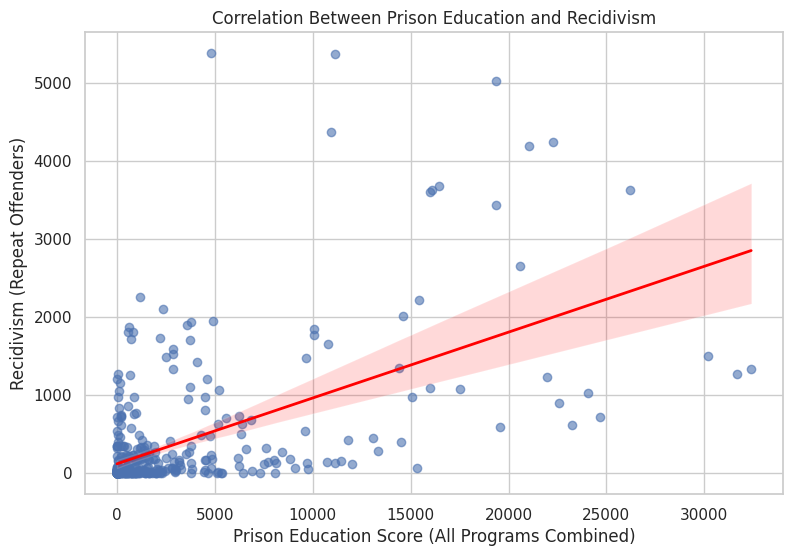

In [ ]:

plt.figure(figsize=(9,6))
sns.regplot(
    data=df_corr,
    x='education_score',
    y='total_habitual_offenders',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red', 'linewidth':2}
)

plt.title("Correlation Between Prison Education and Recidivism")
plt.xlabel("Prison Education Score (All Programs Combined)")
plt.ylabel("Recidivism (Repeat Offenders)")
plt.grid(True)
plt.show()

Though we can see that there is a gneral trend of less recidivism with increasing prison education score, the correlation is not as strong as one might expect, this maybe becuase the educaion is not effective or simply its irrelevant to the prision propulations skill set

# Does better prison vocational education correlate with lower recidivism?

In [ ]:
df = statedata.copy()

df_voc = df[['total_vocational_relief', 'total_habitual_offenders']].dropna()
corr_voc = df_voc['total_vocational_relief'].corr(df_voc['total_habitual_offenders'])

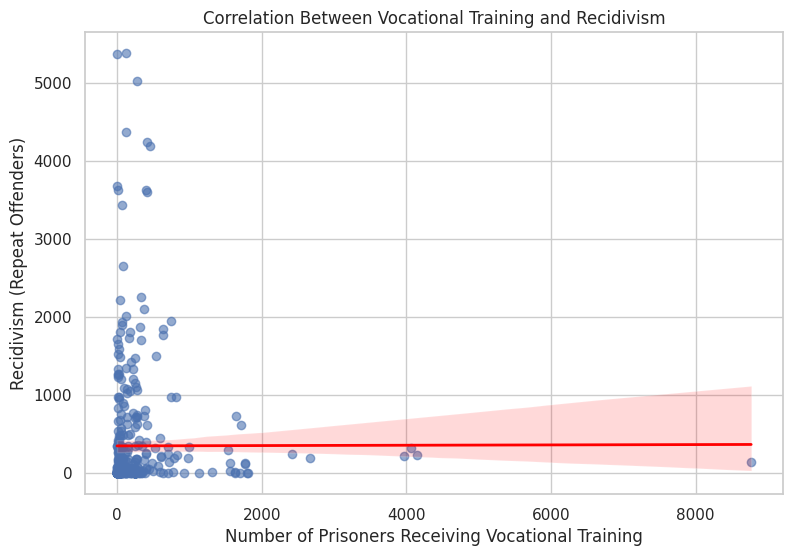

In [ ]:
plt.figure(figsize=(9,6))
sns.regplot(
    data=df_voc,
    x='total_vocational_relief',
    y='total_habitual_offenders',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red', 'linewidth':2}
)

plt.title("Correlation Between Vocational Training and Recidivism")
plt.xlabel("Number of Prisoners Receiving Vocational Training")
plt.ylabel("Recidivism (Repeat Offenders)")
plt.grid(True)
plt.show()

This shows that there is better correlation with vocational learning to less recedivism than with traditional education, this may indicate a need to change the education mindset we think of when considering the rehabilitation of prison population

# Growth of crimes against children in india

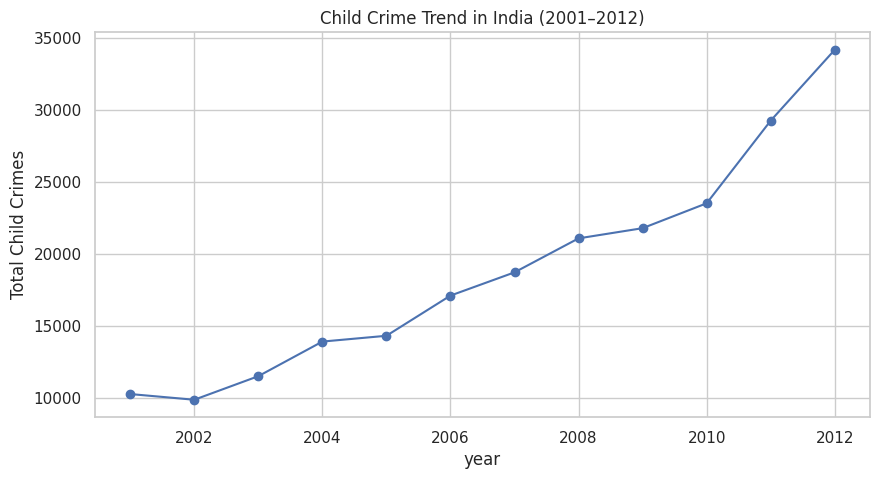

In [ ]:
df_child_year = (
    crime.groupby("year")["total_crime_against_children"]
    .sum()
)

df_child_year.plot(kind="line", marker="o", figsize=(10,5), title="Child Crime Trend in India (2001–2012)")
plt.ylabel("Total Child Crimes")
plt.show()



We can see that there is a tremendous increase in crimes against children in the past few years this may indicate a declining sense of stability in the society

# What is the distribution of crime against women over state

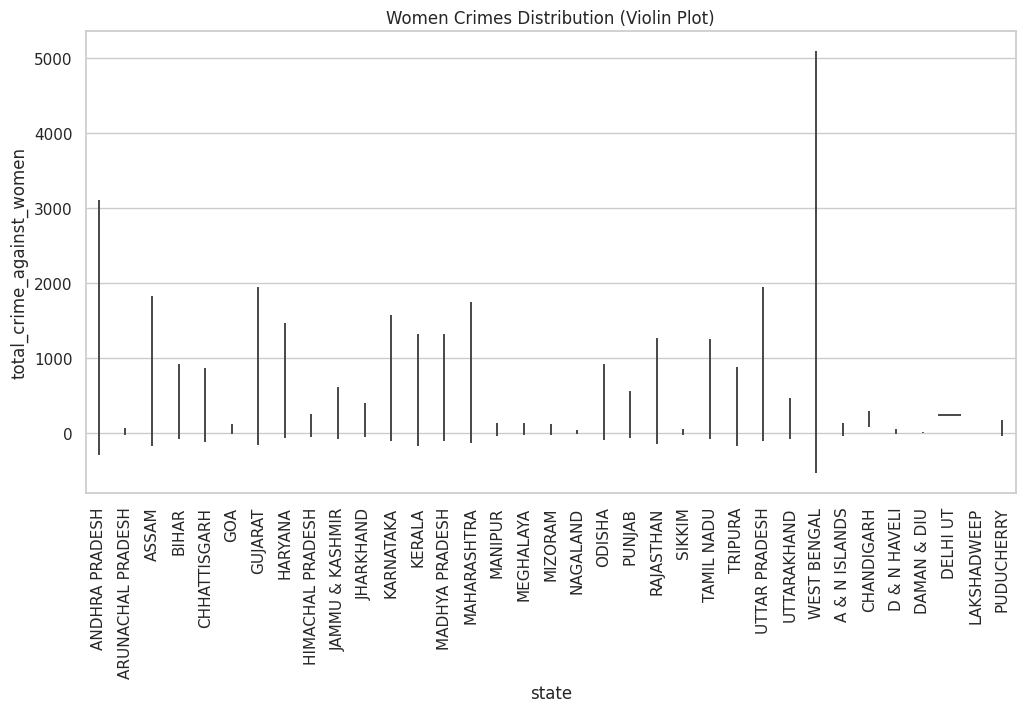

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=crime,
    x="state",
    y="total_crime_against_women",
    inner="quartile"
)
plt.xticks(rotation=90)
plt.title("Women Crimes Distribution (Violin Plot)")
plt.show()

Its clear from the violin plot there are major outliers here like West Bengal and Andhra Pradesh and we still havent accounted for unreported cases.

# What is the distribution of crime against different marginalized communities


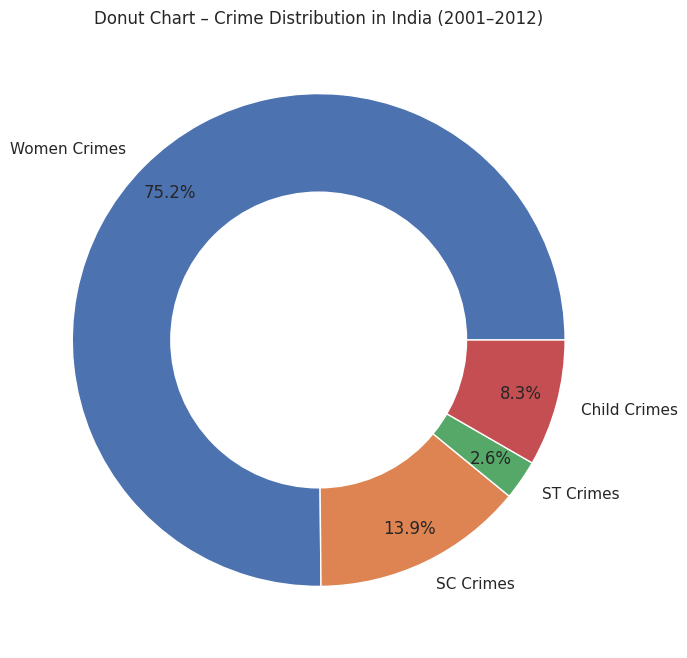

In [ ]:
crime_totals = {

    "Women Crimes": crime["total_crime_against_women"].sum(),
    "SC Crimes": crime["total_crime_against_sc"].sum(),
    "ST Crimes": crime["total_crime_against_st"].sum(),
    "Child Crimes": crime["total_crime_against_children"].sum()
}

values = list(crime_totals.values())
labels = list(crime_totals.keys())

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct="%1.1f%%", pctdistance=0.85)

# create a centre circle for donut
centre = plt.Circle((0,0),0.60,color='white')
plt.gca().add_artist(centre)

plt.title("Donut Chart – Crime Distribution in India (2001–2012)")
plt.show()


We can see that Women are the most victimized marginalized group however we must aslo not forget this graph doesnt take into account the variation of population in different communities

# Distribution of crimes against children across the states

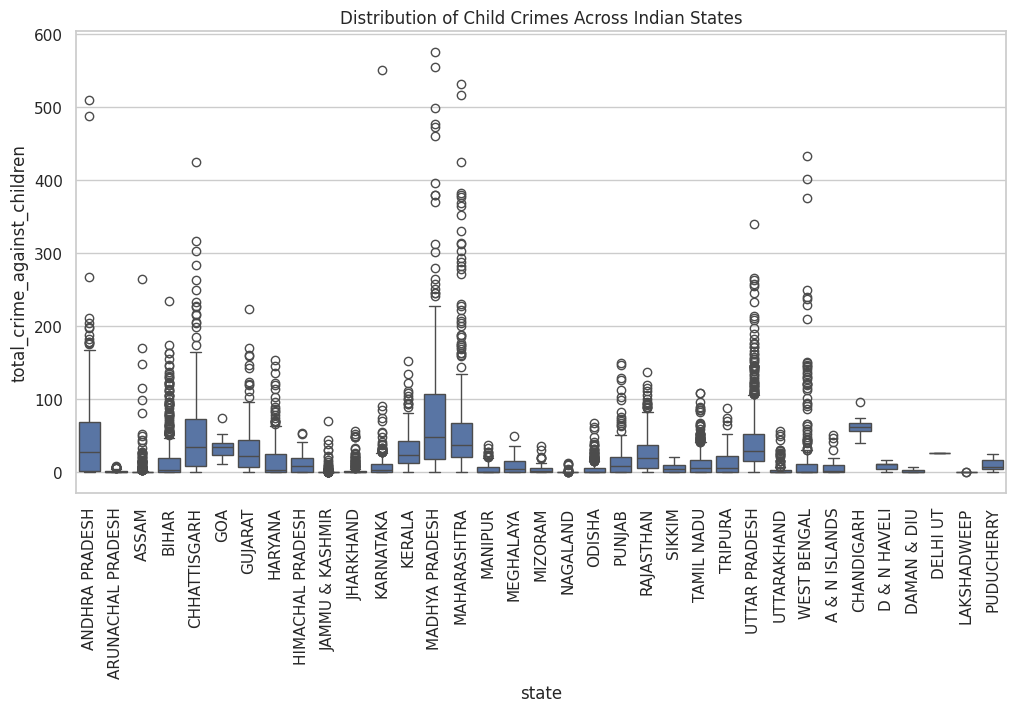

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=crime,
    x="state",
    y="total_crime_against_children"
)
plt.xticks(rotation=90)
plt.title("Distribution of Child Crimes Across Indian States")
plt.show()


We can see that the distirbuiton of crimes aginst children is mostly even though there are notable outliers like Madhya Pradesh